In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [2]:
#load the iris datasets
dataset = datasets.load_iris()

In [3]:
X = dataset.data
y = dataset.target
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=20)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)
print("Training score is ", knn.score(X_train, y_train))
score = knn.score(X_test, y_test)
print("Test Score is ", score)

Training score is  0.9642857142857143
Test Score is  0.9736842105263158


[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


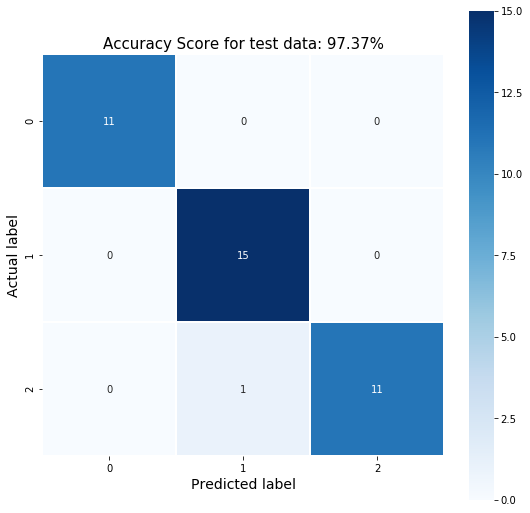

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.94      1.00      0.97        15
          2       1.00      0.92      0.96        12

avg / total       0.98      0.97      0.97        38



In [4]:
# Generate the confusion matrix and classification report
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
all_sample_title = 'Accuracy Score for test data: %0.02f%%' % (100*float(score))
plt.title(all_sample_title, size = 15)
plt.show()
print(classification_report(y_test, y_pred))

In [63]:
neighbors = np.array([5,8,12,16,20])
test_sizes = np.linspace(.1, .3, 3)
train_accuracy = np.empty([len(neighbors),len(test_sizes),2])
test_accuracy = np.empty([len(neighbors),len(test_sizes),2])
f1_scores = np.empty([len(neighbors),len(test_sizes),2])
for i, k in enumerate(neighbors):
    for j, sz in enumerate(test_sizes):
        for s in range(2):
            # Instantiate a k-NN classifier: knn
            knn = KNeighborsClassifier(n_neighbors=k)     
            # Create training and test set
            stratify=None
            if s:
                stratify=y
            X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=sz, random_state=42+i*100+j*10+s, stratify=stratify)
            # Fit the classifier to the training data
            knn.fit(X_train, y_train)

            # Compute F1 score
            y_pred = knn.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            print("F1 score (k=%d, test_size=%0.0f%%, stratify=%s): %f" % (k,sz*100,s, f1))
            
            f1_scores[i, j, s] = f1

F1 score (k=5, test_size=10%, stratify=0): 1.000000
F1 score (k=5, test_size=10%, stratify=1): 1.000000
F1 score (k=5, test_size=20%, stratify=0): 0.966261
F1 score (k=5, test_size=20%, stratify=1): 0.966583
F1 score (k=5, test_size=30%, stratify=0): 0.955556
F1 score (k=5, test_size=30%, stratify=1): 1.000000
F1 score (k=8, test_size=10%, stratify=0): 1.000000
F1 score (k=8, test_size=10%, stratify=1): 0.932660
F1 score (k=8, test_size=20%, stratify=0): 1.000000
F1 score (k=8, test_size=20%, stratify=1): 1.000000
F1 score (k=8, test_size=30%, stratify=0): 0.955081
F1 score (k=8, test_size=30%, stratify=1): 0.977753
F1 score (k=12, test_size=10%, stratify=0): 0.866667
F1 score (k=12, test_size=10%, stratify=1): 1.000000
F1 score (k=12, test_size=20%, stratify=0): 0.900000
F1 score (k=12, test_size=20%, stratify=1): 0.932660
F1 score (k=12, test_size=30%, stratify=0): 0.977778
F1 score (k=12, test_size=30%, stratify=1): 1.000000
F1 score (k=16, test_size=10%, stratify=0): 1.000000
F1 sc

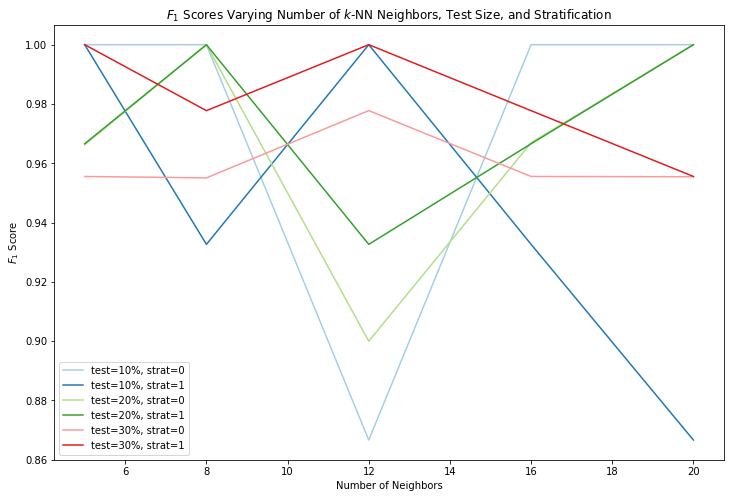

In [64]:
# Generate plot
palette = itertools.cycle(sns.color_palette("Paired", len(test_sizes)*2))
fig, ax = plt.subplots(figsize=(12,8))
plt.title('$F_1$ Scores Varying Number of $k$-NN Neighbors, Test Size, and Stratification')

for j, sz in enumerate(test_sizes):
    for s in range(2):
        plt.plot(neighbors, f1_scores[:,j,s], color=next(palette),
                 label='test=%0.0f%%, strat=%s' % (sz*100, s))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('$F_1$ Score')
plt.show()